In [33]:
import pandas as pd

In [2]:
!pip install numpy==1.20

  Using cached numpy-1.20.0-cp39-cp39-win_amd64.whl (13.7 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
sacrebleu 2.2.0 requires portalocker, which is not installed.
tf-models-official 2.11.3 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.11.3 requires immutabledict, which is not installed.
tf-models-official 2.11.3 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.11.3 requires oauth2client, which is not installed.
tf-models-official 2.11.3 requires opencv-python-headless, which is not installed.
tf-models-official 2.11.3 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.

In [48]:
weather_data=pd.read_csv("weather_data.csv")

In [49]:
weather_data

,STATION,NAME,DATE,AWND,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,...,WDF5,WESF,WSF2,WSF5,WT01,WT02,WT03,WT04,WT06,WT08
0,US1TXLM0003,"POWDERLY 1.0 S, TX US",2022-01-02,NaN,NaN,NaN,0.94,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1TXLM0003,"POWDERLY 1.0 S, TX US",2022-01-09,NaN,NaN,NaN,0.12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1TXLM0003,"POWDERLY 1.0 S, TX US",2022-01-27,NaN,NaN,NaN,0.01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1TXLM0003,"POWDERLY 1.0 S, TX US",2022-02-03,NaN,NaN,NaN,1.30,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1TXLM0003,"POWDERLY 1.0 S, TX US",2022-02-04,NaN,NaN,NaN,0.10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,USC00416794,"PARIS, TX US",2022-12-28,NaN,NaN,NaN,0.00,NaN,NaN,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1472,USC00416794,"PARIS, TX US",2022-12-29,NaN,NaN,NaN,0.00,NaN,NaN,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1473,USC00416794,"PARIS, TX US",2022-12-30,NaN,NaN,NaN,0.00,NaN,NaN,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1474,USC00416794,"PARIS, TX US",2022-12-31,NaN,NaN,NaN,0.00,NaN,NaN,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
weather_data=weather_data.drop( ["STATION","AWND","DAPR","MDPR","SNOW","SNWD","WDF5","WESF","WSF2","WSF5","WT01","WT02","WT03","WT04","WT06","WT08","TOBS","WDF2"],axis='columns')

In [52]:
weather_data=weather_data.set_axis(["NAME","DATE","PRECIPITATION","MAX TEMP","MIN TEMP"],axis='columns')

In [53]:
weather_data

,NAME,DATE,PRECIPITATION,MAX TEMP,MIN TEMP
0,"POWDERLY 1.0 S, TX US",2022-01-02,0.94,NaN,NaN
1,"POWDERLY 1.0 S, TX US",2022-01-09,0.12,NaN,NaN
2,"POWDERLY 1.0 S, TX US",2022-01-27,0.01,NaN,NaN
3,"POWDERLY 1.0 S, TX US",2022-02-03,1.30,NaN,NaN
4,"POWDERLY 1.0 S, TX US",2022-02-04,0.10,NaN,NaN
...,...,...,...,...,...
1471,"PARIS, TX US",2022-12-28,0.00,46.0,21.0
1472,"PARIS, TX US",2022-12-29,0.00,69.0,37.0
1473,"PARIS, TX US",2022-12-30,0.00,72.0,45.0
1474,"PARIS, TX US",2022-12-31,0.00,62.0,45.0


In [54]:
weather_data["MIN TEMP"].value_counts()

74.0    24
72.0    23
73.0    22
71.0    22
75.0    20
        ..
7.0      1
6.0      1
15.0     1
84.0     1
10.0     1
Name: MIN TEMP, Length: 71, dtype: int64

In [55]:
weather_data["PRECIPITATION"]=weather_data["PRECIPITATION"].fillna(0)

In [56]:
weather_data["MIN TEMP"]=weather_data["MIN TEMP"].fillna(0)

In [57]:
weather_data["MAX TEMP"]=weather_data["MAX TEMP"].fillna(0)

In [58]:
null_temp=[index for  index, temp in enumerate(weather_data["MAX TEMP"]) if temp==0]
null_temp

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [59]:
len(null_temp)

753

In [60]:
weather_data=weather_data.drop(null_temp)

In [61]:
weather_data

,NAME,DATE,PRECIPITATION,MAX TEMP,MIN TEMP
744,"PARIS, TX US",2022-01-01,0.76,69.0,26.0
745,"PARIS, TX US",2022-01-02,0.00,34.0,19.0
746,"PARIS, TX US",2022-01-03,0.00,50.0,20.0
747,"PARIS, TX US",2022-01-04,0.00,58.0,24.0
748,"PARIS, TX US",2022-01-05,0.00,64.0,32.0
...,...,...,...,...,...
1471,"PARIS, TX US",2022-12-28,0.00,46.0,21.0
1472,"PARIS, TX US",2022-12-29,0.00,69.0,37.0
1473,"PARIS, TX US",2022-12-30,0.00,72.0,45.0
1474,"PARIS, TX US",2022-12-31,0.00,62.0,45.0


In [62]:
weather_data["TARGET"]=weather_data.shift(-1)["MAX TEMP"]

In [119]:
weather_data=weather_data.drop(1475,axis=0)

In [120]:
weather_data

,NAME,DATE,PRECIPITATION,MAX TEMP,MIN TEMP,TARGET
744,"PARIS, TX US",2022-01-01,0.76,69.0,26.0,34.0
745,"PARIS, TX US",2022-01-02,0.00,34.0,19.0,50.0
746,"PARIS, TX US",2022-01-03,0.00,50.0,20.0,58.0
747,"PARIS, TX US",2022-01-04,0.00,58.0,24.0,64.0
748,"PARIS, TX US",2022-01-05,0.00,64.0,32.0,47.0
...,...,...,...,...,...,...
1470,"PARIS, TX US",2022-12-27,0.00,52.0,20.0,46.0
1471,"PARIS, TX US",2022-12-28,0.00,46.0,21.0,69.0
1472,"PARIS, TX US",2022-12-29,0.00,69.0,37.0,72.0
1473,"PARIS, TX US",2022-12-30,0.00,72.0,45.0,62.0


In [121]:
weather_data["MAX TEMP"].value_counts(0)

92.0     25
94.0     22
99.0     17
78.0     17
69.0     16
         ..
23.0      1
27.0      1
38.0      1
108.0     1
32.0      1
Name: MAX TEMP, Length: 80, dtype: int64

<Axes: >

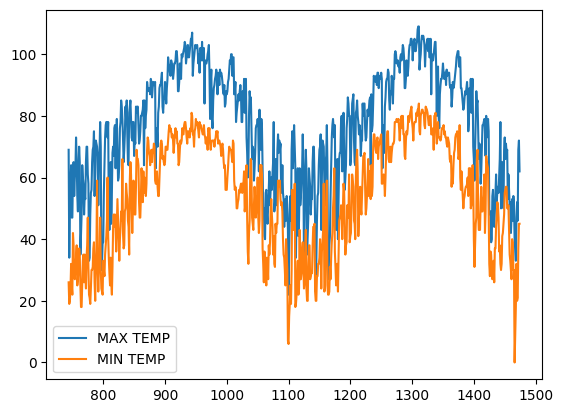

In [122]:
weather_data[["MAX TEMP","MIN TEMP"]].plot()

<Axes: >

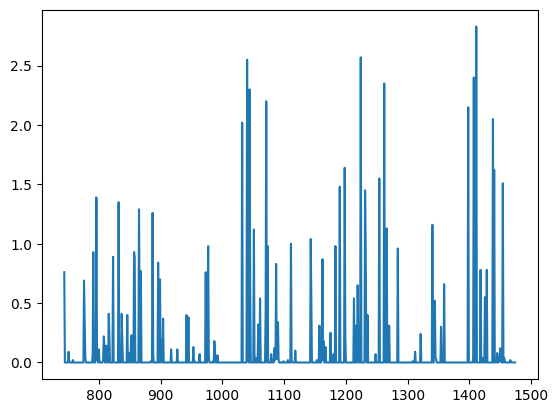

In [123]:
weather_data["PRECIPITATION"].plot()

In [150]:
from sklearn.linear_model import Ridge
regression=Ridge(alpha=.01)

In [151]:
predictors=["PRECIPITATION","MAX TEMP","MIN TEMP"]

In [152]:
train_set=weather_data.loc[:1300]

In [153]:
train_set

,NAME,DATE,PRECIPITATION,MAX TEMP,MIN TEMP,TARGET
744,"PARIS, TX US",2022-01-01,0.76,69.0,26.0,34.0
745,"PARIS, TX US",2022-01-02,0.00,34.0,19.0,50.0
746,"PARIS, TX US",2022-01-03,0.00,50.0,20.0,58.0
747,"PARIS, TX US",2022-01-04,0.00,58.0,24.0,64.0
748,"PARIS, TX US",2022-01-05,0.00,64.0,32.0,47.0
...,...,...,...,...,...,...
1296,"PARIS, TX US",2022-07-06,0.00,103.0,79.0,103.0
1297,"PARIS, TX US",2022-07-07,0.00,103.0,81.0,105.0
1298,"PARIS, TX US",2022-07-08,0.00,105.0,82.0,105.0
1299,"PARIS, TX US",2022-07-09,0.00,105.0,83.0,104.0


In [154]:
test_set=weather_data.loc[1301:]

In [155]:
test_set

,NAME,DATE,PRECIPITATION,MAX TEMP,MIN TEMP,TARGET
1301,"PARIS, TX US",2022-07-11,0.0,98.0,76.0,102.0
1302,"PARIS, TX US",2022-07-12,0.0,102.0,72.0,104.0
1303,"PARIS, TX US",2022-07-13,0.0,104.0,77.0,105.0
1304,"PARIS, TX US",2022-07-14,0.0,105.0,78.0,101.0
1305,"PARIS, TX US",2022-07-15,0.0,101.0,78.0,101.0
...,...,...,...,...,...,...
1470,"PARIS, TX US",2022-12-27,0.0,52.0,20.0,46.0
1471,"PARIS, TX US",2022-12-28,0.0,46.0,21.0,69.0
1472,"PARIS, TX US",2022-12-29,0.0,69.0,37.0,72.0
1473,"PARIS, TX US",2022-12-30,0.0,72.0,45.0,62.0


In [156]:
regression.fit(train_set[predictors],train_set["TARGET"])

Ridge(alpha=0.01)

In [157]:
predict=regression.predict(test_set[predictors])

In [158]:
len(predict)

167

In [159]:
from sklearn.metrics import mean_squared_error , mean_absolute_error


In [160]:
mean_absolute_error(test_set["TARGET"],predict)

5.499479784440022

In [161]:
mean_squared_error(test_set["TARGET"],predict)

53.34454148537174

In [162]:
comparaison=pd.concat([test_set["TARGET"],pd.Series(predict,index=test_set.index)],axis=1)

In [163]:
comparaison

,TARGET,0
1301,102.0,97.215552
1302,104.0,97.716794
1303,105.0,100.700858
1304,101.0,101.607152
1305,101.0,99.543943
...,...,...
1470,46.0,51.621102
1471,69.0,48.916780
1472,72.0,67.028103
1473,62.0,71.699444
